In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Алгоритмы оптимизации
import torch.optim

In [3]:
def show_contours(objective, 
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(5,5))
    plt.contour(X, Y, res, 100)

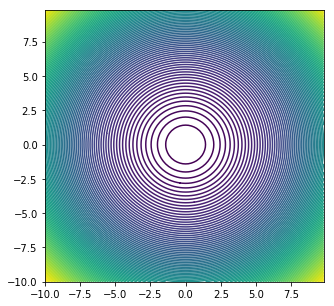

In [4]:
# Функция, которую нужно оптимизировать
def objective(inp):
    return (inp * inp).sum()

show_contours(objective)

In [5]:
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-35 *
       [[ 8.0224],
        [ 8.0224]]) <- result


(2, 4000)


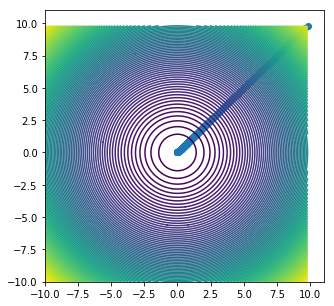

In [6]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

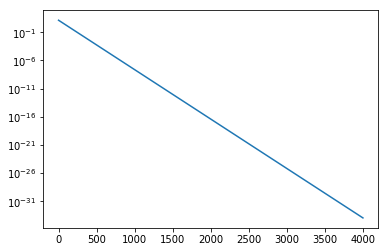

In [7]:
target = np.array([[0, 0]]).T
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plt.semilogy(error_hist);

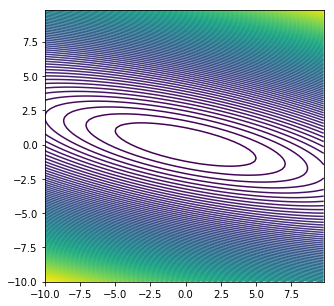

In [8]:
# Функция, которую нужно оптимизировать
def np_objective(inp):
#     print(inp.transpose(0, 1).shape)
    gramma = np.array([[1.0, 2.0], [2.0, 10.0]])
    res = (inp.transpose(1, 0) @ (gramma @ inp)).sum()
    return res

show_contours(np_objective)

In [9]:
# Функция, которую нужно оптимизировать
def objective(inp):
    gramma = torch.tensor([[1.0, 2.0], [2.0, 10.0]])
    res = (inp.transpose(1, 0).mm(gramma.mm(inp))).sum()
    return res

# Задача 1
Решить задачу оптимизации objective, указанного выше несколькими различными способами: 

1) SGD 

2) SGD с моментом

3) Adam

4) RProp

Какой метод обеспечивает быстрейшее схождение к решению? Обсудить результат (делать графики сходимости).

In [10]:
target = np.array([[0, 0]]).T # <- extrema
plots = [] # error plots 

In [11]:
# SGD
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-20 *
       [[ 5.8063],
        [-1.2322]]) <- result


(2, 4000)


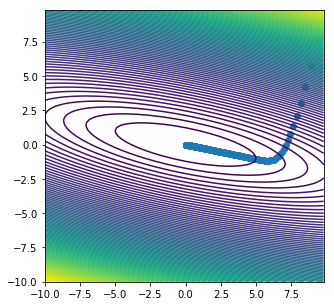

In [12]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(np_objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [13]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

In [14]:
# SGD with momentum
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01, momentum=0.9) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-45 *
       [[-1.4013],
        [ 0.0000]]) <- result


(2, 4000)


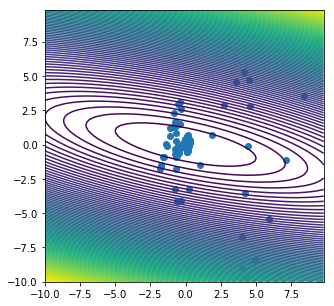

In [15]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(np_objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [16]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

In [17]:
# ADAM
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.Adam([x], lr=0.01 ) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-07 *
       [[ 6.7422],
        [ 6.9273]]) <- result


(2, 4000)


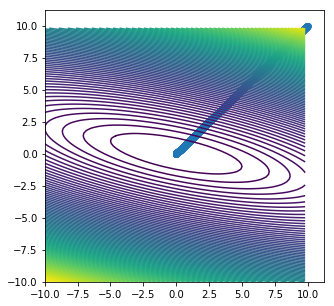

In [18]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(np_objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [19]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

In [20]:
# RPROP
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.Rprop([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-07 *
       [[-7.4562],
        [-7.4562]]) <- result


(2, 4000)


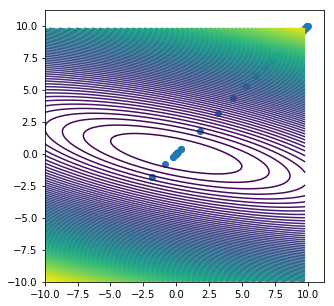

In [21]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(np_objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [22]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

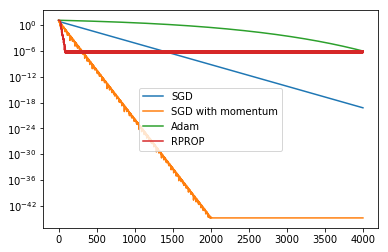

In [23]:
for plot in plots:
    plt.semilogy(plot)
plt.legend(["SGD", "SGD with momentum", "Adam", "RPROP"])
plt.show()

# Задача 2
Решить задачу оптимизации невыпуклой функции $f(x) = 10\sin x \sin y  + x^2 + y^2$, стартуя из точки $x_0 = 10.0, y_0 = 10.0$ всеми подходами, указанными выше.
Какой из методов решает задачу лучше всего и быстрее? Зависит ли решение от начального приближения? Обсудить, почему.

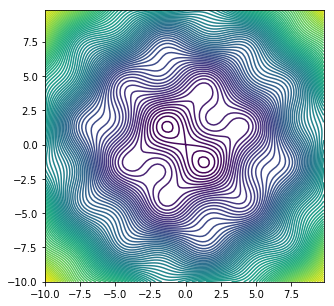

In [24]:
# Функция, которую нужно оптимизировать
def objective(inp):
    res = 10 * torch.sin(inp).prod() + (inp**2).sum()
    return res

# Функция, которую нужно оптимизировать
def np_objective(inp):
    res = 10 * np.sin(inp).prod() + (inp**2).sum()
    return res
show_contours(np_objective)

In [25]:
target = np.array([[0, 0]]).T # <- extrema
plots = [] # error plots 

In [26]:
# SGD
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor([[ 2.4532],
        [ 2.4532]]) <- result


(2, 4000)


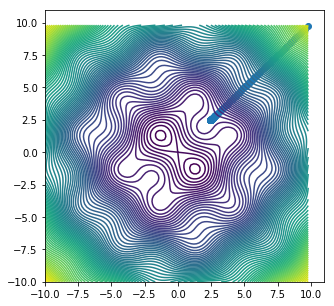

In [27]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(np_objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [28]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

In [29]:
# SGD with momentum
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.SGD([x], lr=0.01, momentum=0.9) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-45 *
       [[ 1.4013],
        [ 1.4013]]) <- result


(2, 4000)


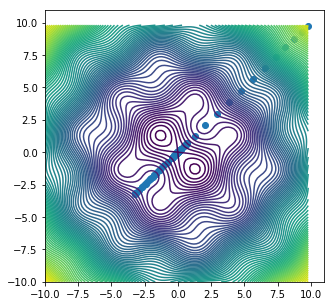

In [30]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(np_objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [31]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

(2, 4000)


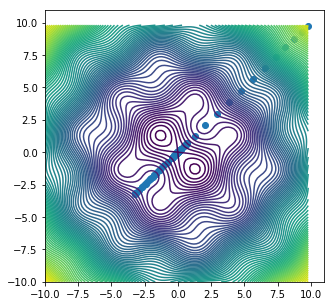

In [32]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(np_objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [33]:
# ADAM
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.Adam([x], lr=0.01 ) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor([[ 2.4532],
        [ 2.4532]]) <- result


(2, 4000)


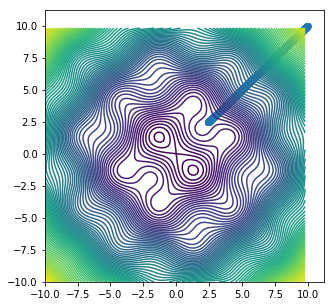

In [34]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(np_objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [35]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

In [36]:
# RPROP
# Начальное состояние
x = torch.tensor([[10.0, 10.0]]).transpose(1, 0)
x.requires_grad = True

# Оптимизатор
optimizer = torch.optim.Rprop([x], lr=0.01) 
print(x, '<- start point')

# Процесс оптимизации
history = []
for step_index in range(4000):
    
    # Тело итерации
    obj_var = objective(x)
    optimizer.zero_grad()
    obj_var.backward()
    optimizer.step() 
    history.append(x.data.clone().numpy()) 
    
# print(history)
print(x, '<- result')

tensor([[ 10.],
        [ 10.]]) <- start point
tensor(1.00000e-07 *
       [[-7.4562],
        [-7.4562]]) <- result


(2, 4000)


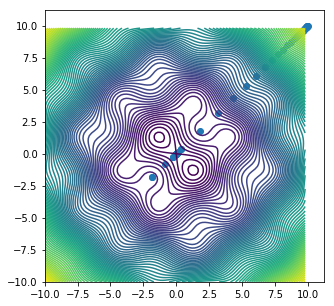

In [37]:
history_arr = np.concatenate(history, axis=1)
print(history_arr.shape)

show_contours(np_objective)
plt.scatter(history_arr[0, :], history_arr[1, :]);

In [38]:
error_hist = np.sqrt(((history_arr - target)**2).sum(axis=0))
plots.append(error_hist)

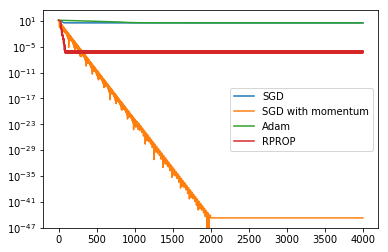

In [39]:
for plot in plots:
    plt.semilogy(plot)
plt.legend(["SGD", "SGD with momentum", "Adam", "RPROP"])
plt.show()